In [1]:
from analysis_SIM_compare_fun_notebook import *
import sys
srcdir = '/Users/wanglab/Documents/ShengyuLi/Velocity/bin/celldancer_polish/src'
sys.path.append(srcdir)
import celldancer.cdplt as cdplt

In [2]:
###############################################
########## cosin similarity analysis ##########
###############################################
# path: server
analysis_result_path='/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/wing_path/analysis_result/'
detail_input_path='/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/wing_path/velocity_result/celldancer/'
raw_input_path='/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/wing_path/raw/'
scv_result_input_path='/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/wing_path/velocity_result/scv/'
foldername_para=''
# # path - hpc
# analysis_result_path='/condo/wanglab/tmhsxl98/Velocity/simulation_velocity_analysis/simulation_data/analysis_result/'
# detail_input_path='/condo/wanglab/tmhsxl98/Velocity/simulation_velocity_analysis/simulation_data/velocity_result/celldancer/'
# raw_input_path='/condo/wanglab/tmhsxl98/Velocity/simulation_velocity_analysis/simulation_data/raw/backpath/'
# scv_result_input_path='/condo/wanglab/tmhsxl98/Velocity/simulation_velocity_analysis/simulation_data/velocity_result/scv/'

# # path - shengyu
# detail_input_path='/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/simulation/data/wing_path/wing_path_20220222/velocity_result/celldancer/'
# raw_input_path='/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/simulation/data/wing_path/wing_path_20220222/raw/'
# scv_result_input_path='/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/simulation/data/wing_path/wing_path_20220222/velocity_result/scv/'
# analysis_result_path='/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/simulation/data/wing_path/wing_path_20220222/analysis_result'

running scv analysis
0.2
0


/Users/wanglab/Documents/ShengyuLi/Velocity/bin/celldancer_polish/analysis/SIM_sl/analysis_SIM_compare_fun_notebook.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['unsplice_predict_true'] = unsplice_predict
/Users/wanglab/Documents/ShengyuLi/Velocity/bin/celldancer_polish/analysis/SIM_sl/analysis_SIM_compare_fun_notebook.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['splice_predict_true'] = splice_predict
/Users/wanglab/.local/lib/python3.7/site-packages/scipy/spatial/distance.py:720:

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990


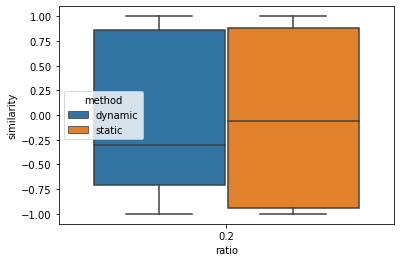

In [4]:
########## scv
# path: server
print('running scv analysis')

# for ratio in [0.2,0.4,0.6,0.8,1]:
for ratio in [0.2]:
    print(ratio)
    scVelo = get_similarity_scVelo(ratio,scv_result_input_path,raw_input_path,type='wing',path='Path2Upper')
    scVelo.to_csv(analysis_result_path+'scvelo_similarity_eachCell'+str(ratio)+'.csv')
    sns.boxplot(x="ratio", y="similarity", hue='method', data=scVelo)

<AxesSubplot:xlabel='ratio', ylabel='similarity'>

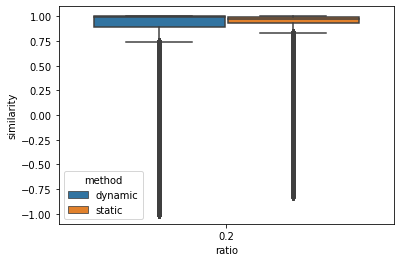

In [5]:
scVelo.to_csv(analysis_result_path+'scvelo_similarity_eachCell'+str(ratio)+'.csv')
sns.boxplot(x="ratio", y="similarity", hue='method', data=scVelo)

In [ ]:
########## celldancer
print('running celldancer analysis')

# for ratio in [0.2,0.4,0.6,0.8]:
for ratio in [0.2]:
    print(ratio)
    cellDancer = get_similarity_cellDancer(ratio,detail_input_path,raw_input_path,type='wing',foldername_para=foldername_para,path='Path2Upper')
    cellDancer.to_csv(analysis_result_path+'celldancer_similarity_eachCell'+str(ratio)+'.csv')
    sns.boxplot(x="ratio", y="similarity", hue='method', data=cellDancer)

In [6]:
########## scv correct col name
ratio_list=[1,0.8,0.6,0.4,0.2]
# ratio_list=[1]
for ratio in ratio_list:
    scv_cell=pd.read_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/wing_path/analysis_result/scvelo_similarity_eachCell'+str(ratio)+'.csv')
    scv_cell=scv_cell.rename(columns={"Unnamed: 0": "cellID", "cell": "gene"})
    scv_cell.to_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/wing_path/analysis_result/scvelo_similarity_eachCell'+str(ratio)+'.csv',index=False)

########## celldancer correct col name
ratio_list=[1,0.8,0.6,0.4,0.2]
# ratio_list=[1]
for ratio in ratio_list:
    scv_cell=pd.read_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/wing_path/analysis_result/celldancer_similarity_eachCell'+str(ratio)+'.csv')
    scv_cell=scv_cell.rename(columns={"Unnamed: 0": "cellID", "cell": "gene"})
    scv_cell.to_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/wing_path/analysis_result/celldancer_similarity_eachCell'+str(ratio)+'.csv',index=False)
###############################################
########## END - cosin similarity analysis ####
###############################################

1
celldancer
scv
0.8
celldancer
scv
0.6
celldancer
scv
0.4
celldancer
scv
0.2
celldancer
scv


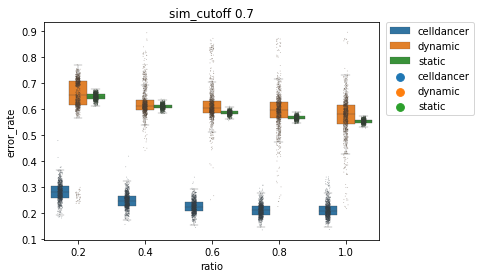

In [7]:
###################################################
########## scv and celldancer error rate ##########
###################################################

# ratio_list=[1]
ratio_list=[1,0.8,0.6,0.4,0.2]
sim_cutoff_list=[0.5,0.6,0.7,0.8,0.9]
sim_cutoff_list=[0.7]



for sim_cutoff in sim_cutoff_list:
    celldancer_error_df_all=pd.DataFrame()
    scv_error_df_all=pd.DataFrame()
    combined_error_df=pd.DataFrame()
    for ratio in ratio_list:
        print(ratio)

        #celldancer
        print('celldancer')
        celldancer_cell=pd.read_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/wing_path/analysis_result/celldancer_similarity_eachCell'+str(ratio)+'.csv')
        celldancer_cell.loc[celldancer_cell.similarity<=sim_cutoff,'cutoff_count']=1
        celldancer_cell.loc[celldancer_cell.similarity>sim_cutoff,'cutoff_count']=0

        error_calc_celldancer=celldancer_cell[['gene','cutoff_count']].groupby('gene').sum().reset_index()
        error_calc_celldancer['error_rate']=error_calc_celldancer.cutoff_count/len(set(celldancer_cell.cellID))
        error_calc_celldancer['method']='celldancer'
        error_calc_celldancer['ratio']=ratio

        celldancer_error_df_all=celldancer_error_df_all.append(error_calc_celldancer)

        #scv
        print('scv')
        scv_cell=pd.read_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/wing_path/analysis_result/scvelo_similarity_eachCell'+str(ratio)+'.csv')
        scv_cell.loc[scv_cell.similarity<=sim_cutoff,'cutoff_count']=1
        scv_cell.loc[scv_cell.similarity>sim_cutoff,'cutoff_count']=0

        error_calc_dynamic=scv_cell[scv_cell['method']=='dynamic'][['gene','cutoff_count']].groupby('gene').sum().reset_index()
        error_calc_dynamic['error_rate']=error_calc_dynamic.cutoff_count/len(set(scv_cell.cellID))
        error_calc_dynamic['method']='dynamic'
        error_calc_dynamic['ratio']=ratio

        error_calc_static=scv_cell[scv_cell['method']=='static'][['gene','cutoff_count']].groupby('gene').sum().reset_index()
        error_calc_static['error_rate']=error_calc_static.cutoff_count/len(set(scv_cell.cellID))
        error_calc_static['method']='static'
        error_calc_static['ratio']=ratio

        scv_error_df=pd.concat([error_calc_dynamic,error_calc_static])
        scv_error_df_all=scv_error_df_all.append(scv_error_df)
        
        # combine celldancer and scv
    combined_error_df=pd.concat([celldancer_error_df_all,scv_error_df_all])
    combined_error_df.to_csv(('/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/wing_path/analysis_result/'+'error_sim'+str(sim_cutoff)+'.csv'),index=False)
    # plt.figure()
    # plt.title('sim_cutoff '+str(sim_cutoff))
    # sns.color_palette("flare", as_cmap=True)

    # sns.boxplot(x="ratio", y="error_rate", hue='method', data=combined_error_df)
    plot_box_error(combined_error_df,sim_cutoff)
    plt.savefig('/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/wing_path/analysis_result/'+'error_sim'+str(sim_cutoff)+'.pdf')


###################################################
#######End scv and celldancer error rate ##########
###################################################

In [ ]:
###################################################
#### several samples for backpath  ###############
###################################################

import pandas as pd
from velocity_plot import velocity_plot as vpl
scv_result=pd.read_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/wing_path/velocity_result/scv/scvelo_result_wing_path__splice_unsplice_splice_predict_unsplice_predict_dynamic_and_steady_df_1.csv')
celldancer_result=pd.read_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/wing_path/velocity_result/celldancer/ratio1_all_geneepoch200check_nNoneLr0.001C2cf0.3Downneighborsplice_200_200Ratio0.125N30OAdamtraceR0.0corrcoefR0.0/detail_e200.csv')
scv_dynamic_result=scv_result[['gene_list','dynamic_splice','dynamic_unsplice','dynamic_splice_predict','dynamic_unsplice_predict']]
scv_static_result=scv_result[['gene_list','static_splice','static_unsplice','static_splice_predict','static_unsplice_predict']]
scv_dynamic_result=scv_dynamic_result.rename(columns={"gene_list": "gene_name", "dynamic_splice": "splice", "dynamic_unsplice": "unsplice","dynamic_splice_predict": "splice_predict", "dynamic_unsplice_predict": "unsplice_predict"})
scv_static_result=scv_static_result.rename(columns={"gene_list": "gene_name", "static_splice": "splice", "static_unsplice": "unsplice","static_splice_predict": "splice_predict", "static_unsplice_predict": "unsplice_predict"})
scv_dynamic_result['splice_predict']=scv_dynamic_result.splice+scv_dynamic_result.splice_predict
scv_dynamic_result['unsplice_predict']=scv_dynamic_result.unsplice+scv_dynamic_result.unsplice_predict

scv_static_result['unsplice_predict']=scv_static_result.unsplice+scv_static_result.unsplice_predict
scv_static_result['splice_predict']=scv_static_result.splice+scv_static_result.splice_predict

path='/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/wing_path/velocity_result/compare_gene_velocity_figures/'
gene_list=[4,5,8,9,14,26,29,35,40,43,44,61,63,67,81,89,95,96,98]
for i in gene_list:
    gene='simulation'+str(i)
    # vpl.velocity_gene(gene,celldancer_result,alpha_inside=0.1,point_size=150)
    # vpl.velocity_gene(gene,scv_dynamic_result,alpha_inside=0.1,point_size=150,color_scatter='orange')
    # vpl.velocity_gene(gene,scv_static_result,alpha_inside=0.1,point_size=150,color_scatter='green')
    vpl.velocity_gene(gene,celldancer_result,alpha_inside=0.1,point_size=150,color_scatter='green',save_path=path+gene+'_celldancer'+'.pdf')
    vpl.velocity_gene(gene,scv_dynamic_result,alpha_inside=0.1,point_size=150,color_scatter='green',save_path=path+gene+'_dynamic'+'.pdf')
    vpl.velocity_gene(gene,scv_static_result,alpha_inside=0.1,point_size=150,color_scatter='green',save_path=path+gene+'_static'+'.pdf')
###################################################
#### end - several samples for backpath  #########
###################################################

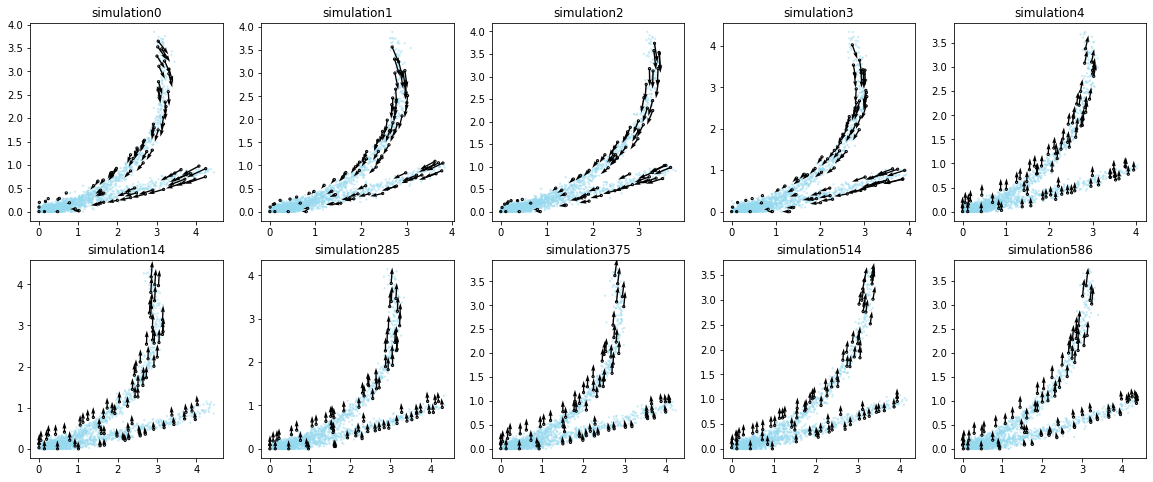

In [19]:
import math
df=pd.read_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/wing_path/velocity_result/celldancer/ratio1/celldancer_estimation.csv')

gene_list=list(df.gene_name.drop_duplicates())[0:10]
gene_list=['simulation0','simulation1','simulation2','simulation3','simulation4','simulation14','simulation285','simulation375','simulation514','simulation586']

ncols=5
height=math.ceil(len(gene_list)/5)*4
fig = plt.figure(figsize=(20,height))

for i in range(len(gene_list)):
    ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
    cdplt.gene.scatter_gene(
        ax=ax,
        x='splice',
        y='unsplice',
        cellDancer_df=df,
        custom_xlim=None,
        custom_ylim=None,
        colors=None,
        alpha=0.5, 
        s = 5,
        velocity=True,
        gene=gene_list[i])
    
    ax.set_title(gene_list[i])
    # ax.axis('off')

plt.show()